In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

In [177]:
EARLY_STOP_NUMBER = 3

In [178]:
df = pd.read_csv("../../../../data/ml/ru_roberta_large_finetune/metric_history.csv", index_col=0)
df.head()

,train_perplexity,train_mean_loss,test_perplexity,test_mean_loss
0,23549.620092,10.066865,2330.974435,7.754042
1,3378.338287,8.125139,2147.079945,7.671864
2,2926.510253,7.981566,1431.409811,7.266415
3,1941.331432,7.571129,821.535740,6.711175
4,2060.447876,7.630679,581.830396,6.366179


In [179]:
df

,train_perplexity,train_mean_loss,test_perplexity,test_mean_loss
0,23549.620092,10.066865,2330.974435,7.754042
1,3378.338287,8.125139,2147.079945,7.671864
2,2926.510253,7.981566,1431.409811,7.266415
3,1941.331432,7.571129,821.535740,6.711175
4,2060.447876,7.630679,581.830396,6.366179
...,...,...,...,...
95,272.221226,5.606615,289.068627,5.666664
96,465.363550,6.142819,116.648573,4.759166
97,313.108895,5.746551,252.091909,5.529794
98,276.354656,5.621685,249.863566,5.520915


In [187]:
def find_start_first_non_decreased_sequent(series_data, window):
    rolled_data = series_data.rolling(window).apply(lambda x: all(i < j for i, j in zip(x, x[1:]))).fillna(0.0)
    increased_values_iter = [idx for idx, x in enumerate(rolled_data) if x > 0.0]
    if len(increased_values_iter):
        return increased_values_iter[0] - 1
    else:
        return None

In [188]:
find_start_first_non_decreased_sequent(df.test_perplexity, EARLY_STOP_NUMBER)

5

In [189]:
df

,train_perplexity,train_mean_loss,test_perplexity,test_mean_loss
0,23549.620092,10.066865,2330.974435,7.754042
1,3378.338287,8.125139,2147.079945,7.671864
2,2926.510253,7.981566,1431.409811,7.266415
3,1941.331432,7.571129,821.535740,6.711175
4,2060.447876,7.630679,581.830396,6.366179
...,...,...,...,...
95,272.221226,5.606615,289.068627,5.666664
96,465.363550,6.142819,116.648573,4.759166
97,313.108895,5.746551,252.091909,5.529794
98,276.354656,5.621685,249.863566,5.520915


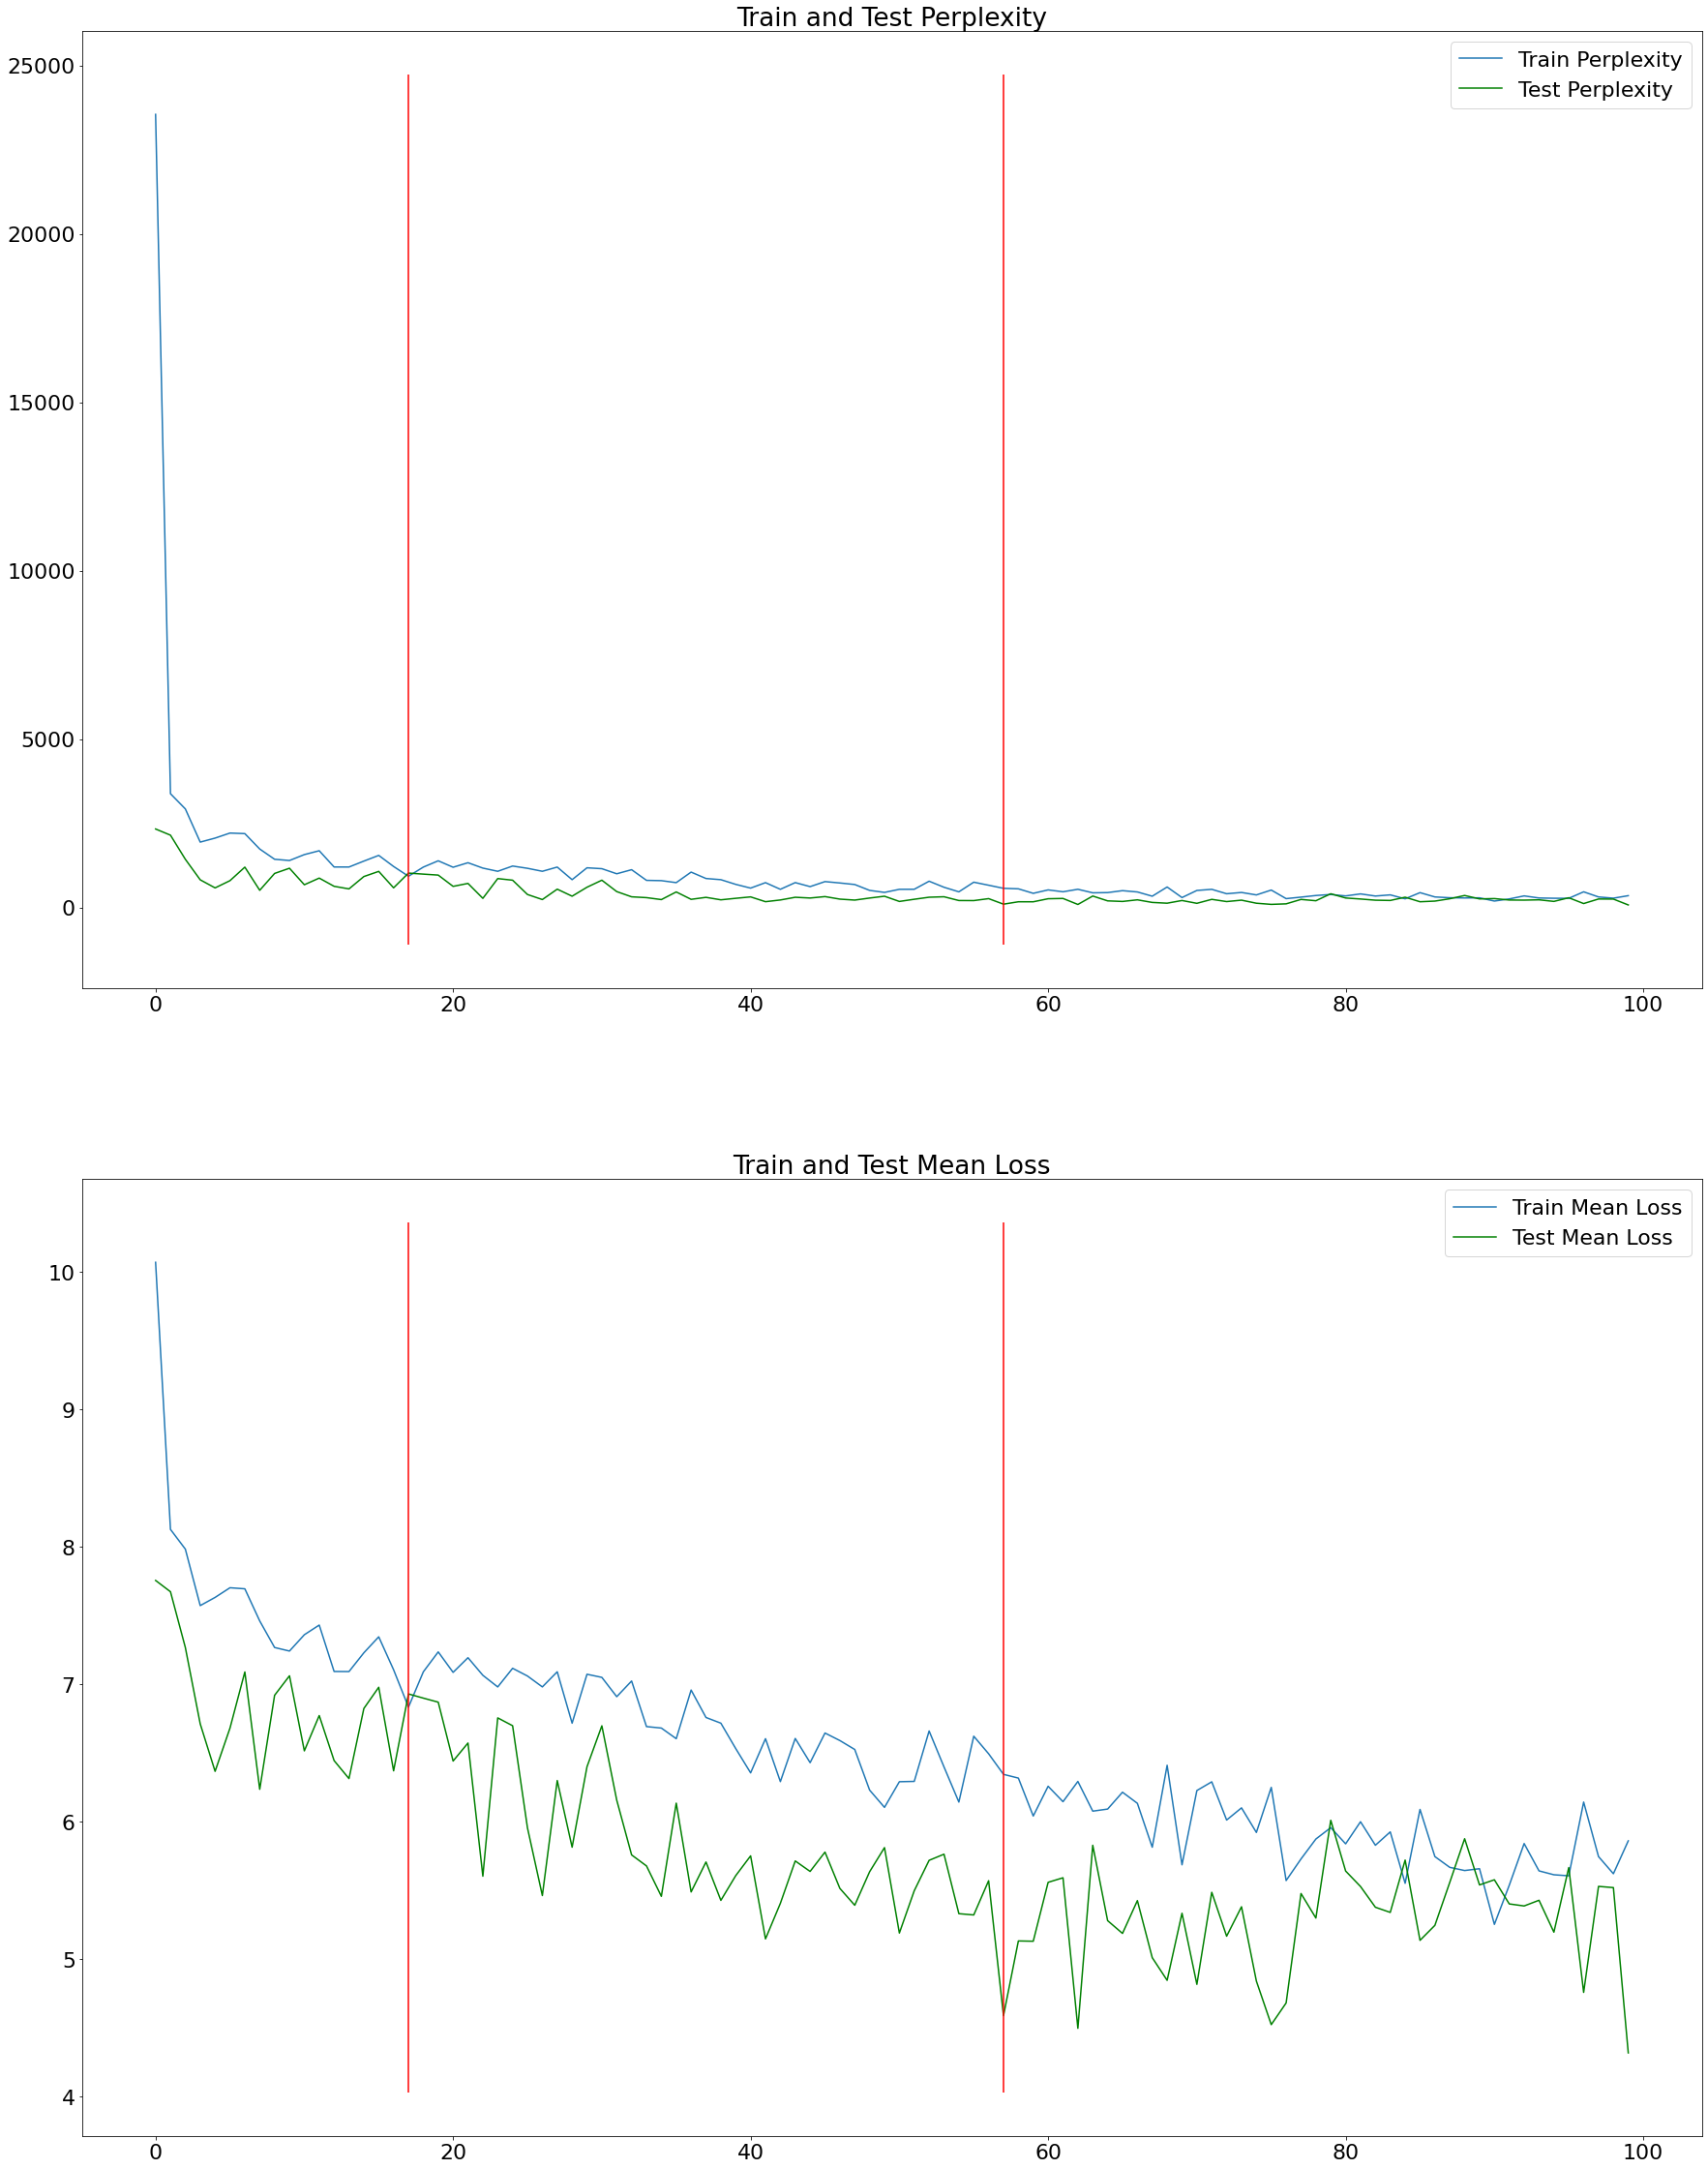

In [193]:
fig, ax = plt.subplots(nrows=2)

fig.set_size_inches(30,40)

df.train_perplexity.plot(ax=ax[0], label="Train Perplexity")
df.test_perplexity.plot(ax=ax[0], label="Test Perplexity", color="g")
ax[0].set_title("Train and Test Perplexity")
ax_0_lim = ax[0].get_ylim()
ax[0].vlines(x=17, ymin=ax_0_lim[0], ymax=ax_0_lim[1], colors="r")
ax[0].vlines(x=57, ymin=ax_0_lim[0], ymax=ax_0_lim[1], colors="r")
ax[0].legend()

df.train_mean_loss.plot(ax=ax[1], label="Train Mean Loss")
df.test_mean_loss.plot(ax=ax[1], label="Test Mean Loss", color="g")
ax[1].set_title("Train and Test Mean Loss")
ax_1_lim = ax[1].get_ylim()
ax[1].vlines(x=17, ymin=ax_1_lim[0], ymax=ax_1_lim[1], colors="r")
ax[1].vlines(x=57, ymin=ax_1_lim[0], ymax=ax_1_lim[1], colors="r")
ax[1].legend()


plt.show()